In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [209]:
df = pd.read_csv('Ecommerce Customers.csv')

In [210]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


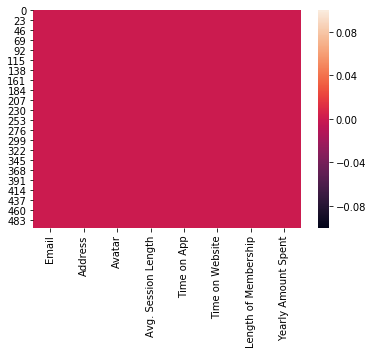

In [211]:
sns.heatmap(df.isnull())

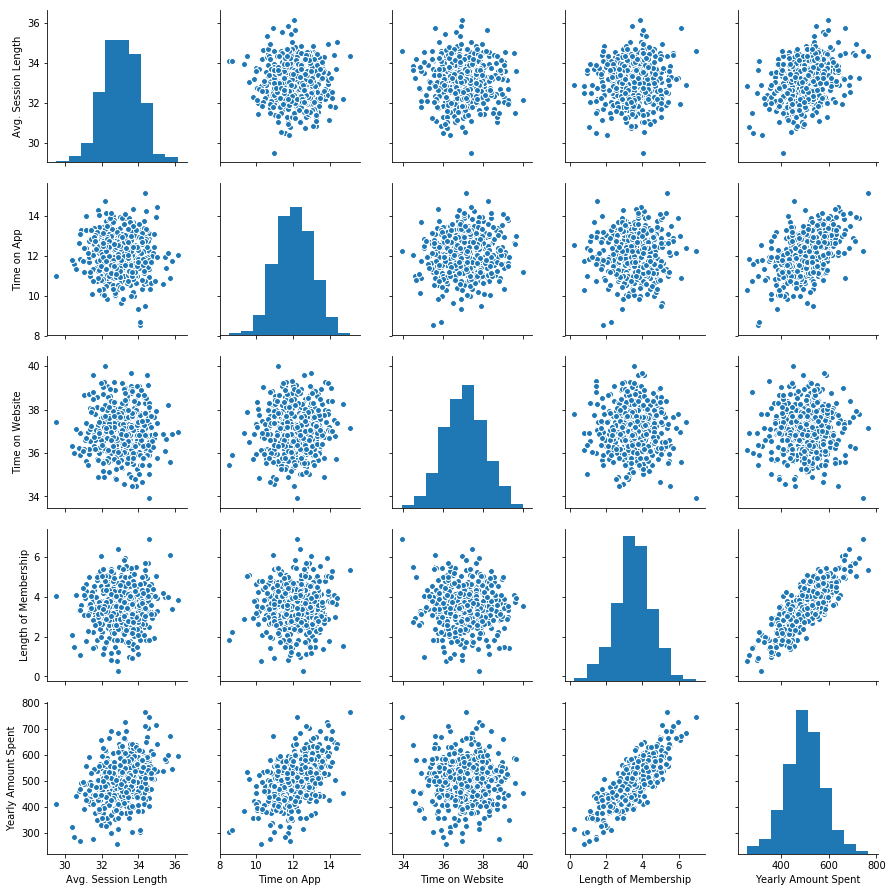

In [212]:
sns.pairplot(df)

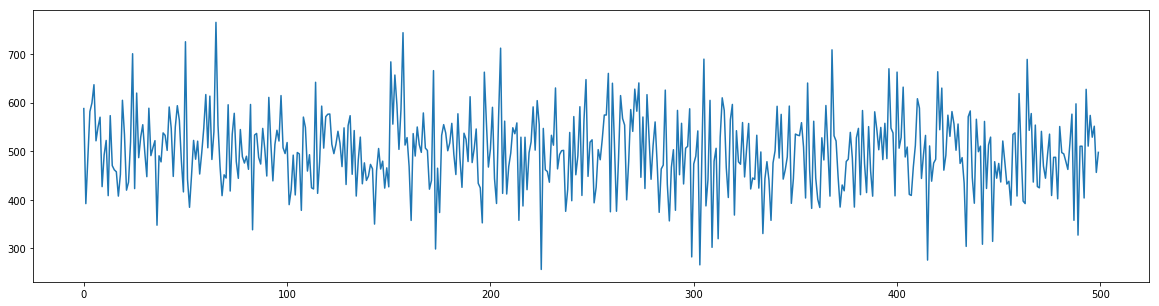

In [213]:
fig,ax = plt.subplots(figsize=(20,5))
plt.plot(df['Yearly Amount Spent'])

In [214]:
# Drop features that do not relate to yearly amount spent
df = df.drop(['Email', 'Address', 'Avatar'], axis=1)

In [215]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5)
memory usage: 19.6 KB


In [269]:
# convert the dataframe to array to be easier to use in the forloo
#df_x = df.values
# exclude the dependent variable
df_x = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
df_y = df['Yearly Amount Spent']

In [270]:
X_train = np.array(df_x[0:400])
y_train = np.array(df_y[0:400])

X_test = np.array(df_x[400:])
y_test = np.array(df_y[400:])

# Now let's start writing the codes for gradient descent for the linear regression.


In [272]:
# training set
def minimize_m_b(X_train,y_train,init_m1 , init_b1, learning_rate):
    minimize_m = init_m1
    minimize_b = [x for x in init_b1] 
    # without setting up the values for minimize_b in this way, the values for both will keep adding up
    minimized_b = [0 for x in range(regressors)]
    
    for i in range(N):
        sum_m_b = 0 # forgot to put this and cause the huge numbers for m and b
        
        for j in range(regressors):
            sum_m_b += init_b1[j] * X_train[i][j]
        minimize_m +=  init_m1 + sum_m_b - y_train[i]
        for k in range(regressors):
            minimize_b[k] += (init_m1 + sum_m_b - y_train[i]) * X_train[i][k]
        
    minimized_m = init_m1 - (learning_rate *(1/N) * minimize_m)
    for l in range(regressors):
        minimized_b[l] = init_b1[l] - (learning_rate * (1/N) * minimize_b[l])
    
    store_m.append(minimized_m)
    store_b.append(minimized_b)
    return [minimized_m, minimized_b]


def run_minimize_m_b(X_train,y_train,init_m, init_b, learning_rate, num_iteration):
    init_m1 = init_m
    init_b1 = [x for x in init_b]
    for i in range(num_iteration):
        init_m1,init_b1 = minimize_m_b(X_train,y_train, init_m1, init_b1, learning_rate)
    return [init_m1, init_b1] # the problem for the huge numbers are here, after switch to m1 and b1, the number get smaller


# declare hte variables with some values
regressors = len(X_train[0])
init_m = 0
init_b = [0 for x in range(regressors)]
learning_rate = 0.0001
num_iteration = 20000
N = len(X_train)
# number of traiing example here is just 1(time on app), so 1/m is just 1
store_m = []
store_b = []

m, b = run_minimize_m_b(X_train,y_train, init_m, init_b, learning_rate, num_iteration)
print ("intercept: ",m, "Slope: ",b)       

intercept:  -0.635105347769 Slope:  [12.178849486918972, 30.161009220756483, -12.138594171593882, 52.230064331925853]


ValueError: too many values to unpack (expected 1)

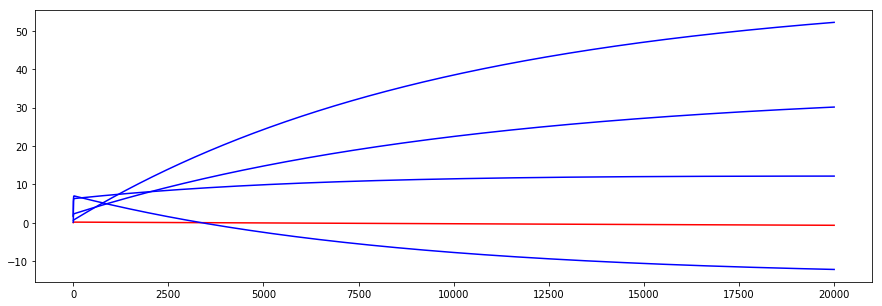

In [274]:
# looks like 500 interations is overkilled.
fig,ax = plt.subplots(figsize=(15,5))
a1, = ax.plot(store_m, color='red')
a2, = ax.plot(store_b, color='blue')

plt.legend([a1,a2],['T_Intercept', 'T_slope'])

In [275]:
num_iteration = 1000
# number of traiing example here is just 1(time on app), so 1/m is just 1
store_m = []
store_b = []

m, b = run_minimize_m_b(X_train,y_train, init_m, init_b, learning_rate, num_iteration)
print ("intercept: ",m, "Slope: ",b)       

intercept:  0.146273159156 Slope:  [7.2717746034783151, 5.3076997425956636, 4.6874454808969102, 6.4175266159547038]


ValueError: too many values to unpack (expected 1)

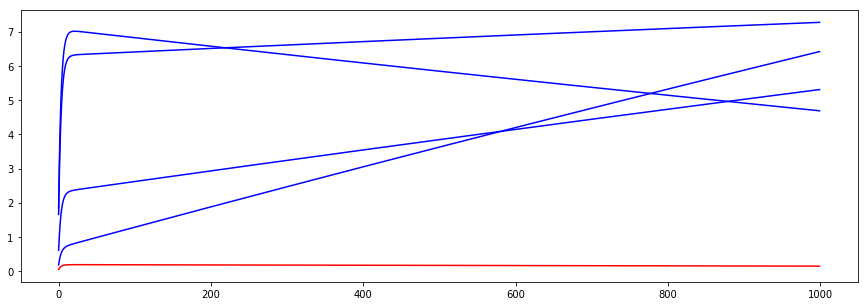

In [276]:
# looks like 500 interations is overkilled.
fig,ax = plt.subplots(figsize=(15,5))
a1, = ax.plot(store_m, color='red')
a2, = ax.plot(store_b, color='blue')

plt.legend([a1,a2],['T_Intercept', 'T_slope'])

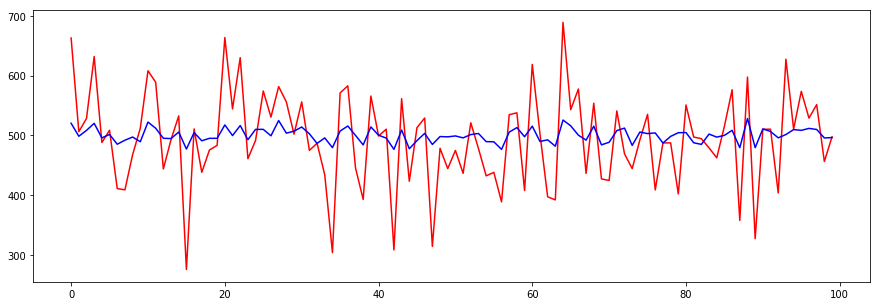

In [277]:
sub_sum=0
predicted_y=[]
for i in range(len(y_test)):
    for j in range(regressors):
        sub_sum += b[j]*X_test[i][j]
    predicted_y.append(m + sub_sum)
    sub_sum = 0

fir, ax = plt.subplots(figsize=(15,5))
a1, =plt.plot(y_test, color='red')
a2,=plt.plot(predicted_y, color='blue')

In [278]:
predicted_values = np.array(predicted_y)

Text(0.5,1,'Residual plot')

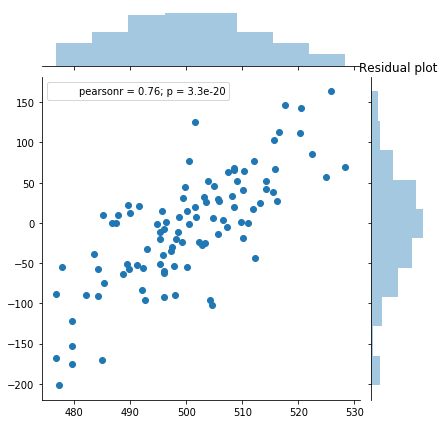

In [279]:
sns.jointplot(predicted_values, y_test - predicted_values )
plt.title('Residual plot')

In [280]:
from sklearn import metrics
print('Learning rate: ',learning_rate,'  intercept: ', m,'parameters',b)
print('R square: ',metrics.r2_score(y_test, predicted_values))
print('Rmse: ',np.sqrt(metrics.mean_squared_error(y_test, predicted_values)))

Learning rate:  0.0001   intercept:  0.146273159156 parameters [7.2717746034783151, 5.3076997425956636, 4.6874454808969102, 6.4175266159547038]
R square:  0.217104747862
Rmse:  70.3290927275


# Check under fit or over fit

In [281]:
X_train = np.array(df_x[0:300])
y_train = np.array(df_y[0:300])

cv_X_train = np.array(df_x[300:400])
cv_y_train = np.array(df_y[300:400])


In [313]:
# error for the training set
# increase from 1 training set to k training sets
training_set_error=[]
init_error = 0.0
total_error =0.0
N = len(cv_X_train)
sums=0
sums2=0
sums3=0
# training = 1
for x in range(1):
    for y in range(regressors):
        sums += b[y] * X_train[x][y]
    training_set_error.append(0.5 * (m + sums - y_train[x])**2)
    
# start from 2 so the inner for loop will work
for i in range(2, N):
    for j in range(0,i):
        for k in range(regressors):
            sums2 += b[k] * X_train[j][k]
        init_error += (((m + sums2) - y_train[j])**2)
        sums2 = 0
    total_error = (1/(2 * i) * init_error)
    training_set_error.append(total_error)
    init_error = 0.0
    total_error = 0.0
    if(i == 99):
        for l in range(N):
            for ll in range(regressors):
                sums3 += b[ll] * X_train[l][ll]
            init_error += (((m + sums3) - y_train[l])**2)
            sums3 = 0
        total_error = (1/(2 * N) * init_error)
        training_set_error.append(total_error)
        init_error = 0.0

        
        
# error for the cross validation set
init_error = 0.0
total_error =0.0
cv_training_set_error=[]
N2 = len(cv_X_train)
sums=0
sums2=0
sums3=0

# training = 1
for x in range(1):
    for y in range(regressors):
        sums += b[y] * cv_X_train[x][y]
    cv_training_set_error.append(0.5 * (m + sums - cv_y_train[x])**2)


# start from 2 so the inner for loop will work
for i in range(2, N):
    for j in range(0,i):
        for k in range(regressors):
            sums2 += b[k] * cv_X_train[j][k]
        init_error += (((m + sums2) - cv_y_train[j])**2)
        sums2 = 0
    total_error = (1/(2 * i) * init_error)
    cv_training_set_error.append(total_error)
    init_error = 0.0
    total_error =0.0
    if(i == 99):
        for l in range(N):
            for ll in range(regressors):
                sums3 += b[ll] * cv_X_train[l][ll]
            init_error += (((m + sums3) - cv_y_train[l])**2)
            sums3 = 0
        total_error = (1/(2 * N) * init_error)
        cv_training_set_error.append(total_error)
        init_error = 0.0


In [311]:
training_size = [int (x)for x in range(len(cv_X_train))]

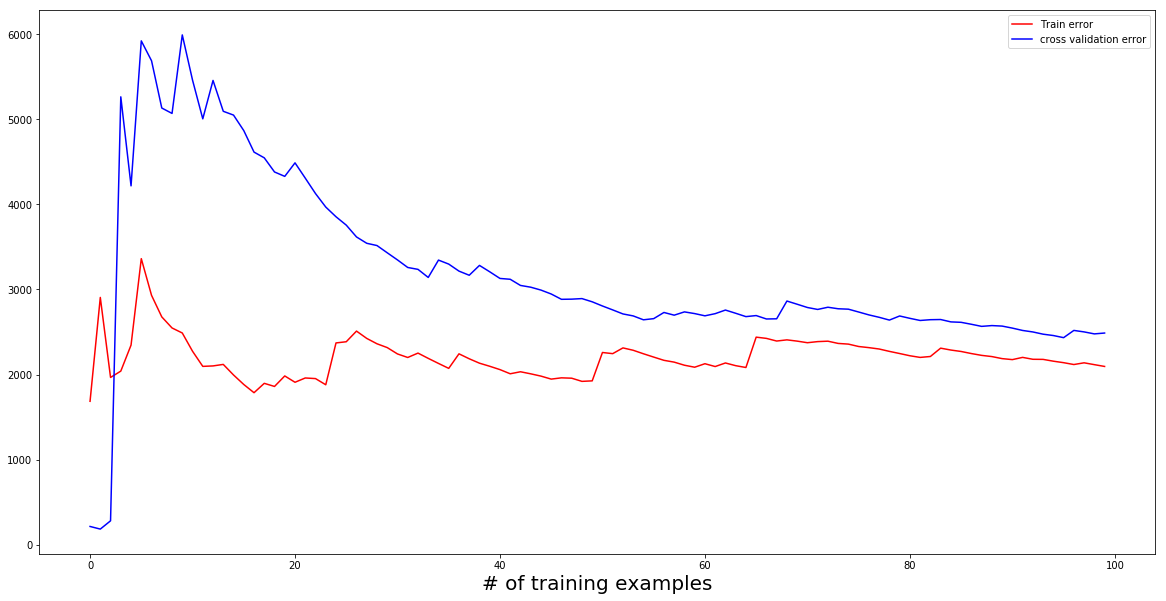

In [314]:
fig,ax = plt.subplots(figsize=(20,10))
a1, = ax.plot(training_size,training_set_error, color='red')
a2, = ax.plot(training_size,cv_training_set_error, color='blue')
plt.xlabel('# of training examples',size=20)
plt.legend([a1,a2],['Train error', 'cross validation error'])

# Let's include the regularization term

In [433]:
# the arrays were changed to find out if the model is under or over fit. now change it back.

X_train = np.array(df_x[0:350])
y_train = np.array(df_y[0:350])

X_test = np.array(df_x[350:])
y_test = np.array(df_y[350:])

In [436]:
# declare hte variables with some values
regressors = len(X_train[0])
init_m = 0
init_b = [0 for x in range(regressors)]
learning_rate = 0.0001
num_iteration = 500
N = len(X_train)
# number of traiing example here is just 1(time on app), so 1/m is just 1
landa = 100


# training set
def minimize_m_b(X_train,y_train,init_m1 , init_b1, learning_rate, landa):
    minimize_m = init_m1
    minimize_b = [x for x in init_b1] 
    # without setting up the values for minimize_b in this way, the values for both will keep adding up
    minimized_b = [0 for x in range(regressors)]
    
    for i in range(N):
        sum_m_b = 0 # forgot to put this and cause the huge numbers for m and b
        
        for j in range(regressors):
            sum_m_b += init_b1[j] * X_train[i][j]
        minimize_m +=  init_m1 + sum_m_b - y_train[i]
        for k in range(regressors):
            minimize_b[k] += (init_m1 + sum_m_b - y_train[i]) * X_train[i][k]
        
    minimized_m = init_m1 * (1 - (learning_rate * landa) / N) - ((learning_rate / N) * minimize_m)

    for l in range(regressors):
        minimized_b[l] = init_b1[l] * (1 - (learning_rate * landa) / N) - ((learning_rate / N) * minimize_b[l])
        
    return [minimized_m, minimized_b]


def run_minimize_m_b(X_train,y_train,init_m, init_b, learning_rate, num_iteration, landa):
    init_m1 = init_m
    init_b1 = [x for x in init_b]
    for i in range(num_iteration):
        init_m1,init_b1 = minimize_m_b(X_train,y_train, init_m1, init_b1, learning_rate, landa)
    return [init_m1, init_b1] # the problem for the huge numbers are here, after switch to m1 and b1, the number get smaller



m, b = run_minimize_m_b(X_train,y_train, init_m, init_b, learning_rate, num_iteration, landa)
print ("intercept: ",m, "Slope: ",b)       

intercept:  0.169095763308 Slope:  [6.8019385099729126, 3.848259028333755, 5.8499514469882969, 3.6734471780374567]


In [437]:
sub_sum=0
predicted_y=[]
for i in range(len(y_test)):
    for j in range(regressors):
        sub_sum += b[j]*X_test[i][j]
    predicted_y.append(m + sub_sum)
    sub_sum = 0
    
predicted_values = np.array(predicted_y)

print('Learning rate: ',learning_rate,'  intercept: ', m,'parameters',b)
print('R square: ',metrics.r2_score(y_test, predicted_values))
print('Rmse: ',np.sqrt(metrics.mean_squared_error(y_test, predicted_values)))

Learning rate:  0.0001   intercept:  0.169095763308 parameters [6.8019385099729126, 3.848259028333755, 5.8499514469882969, 3.6734471780374567]
R square:  0.156244135365
Rmse:  71.7457351854


In [438]:

landa = 400
m, b = run_minimize_m_b(X_train,y_train, init_m, init_b, learning_rate, num_iteration, landa)

sub_sum=0
predicted_y=[]
for i in range(len(y_test)):
    for j in range(regressors):
        sub_sum += b[j]*X_test[i][j]
    predicted_y.append(m + sub_sum)
    sub_sum = 0
    
predicted_values = np.array(predicted_y)

print('Learning rate: ',learning_rate,'  intercept: ', m,'parameters',b)
print('R square: ',metrics.r2_score(y_test, predicted_values))
print('Rmse: ',np.sqrt(metrics.mean_squared_error(y_test, predicted_values)))

Learning rate:  0.0001   intercept:  0.16949090241 parameters [6.7894245179246369, 3.8154179961360817, 5.8733667793535078, 3.6107604584048927]
R square:  0.154855147766
Rmse:  71.8047646759


In [ ]:
slightly worse after increasing landa. maybe this is not the case of high variance.

# Tune the learning rate and landa

In [439]:
# add the learning rate as a argument and return the best one

def minimize_m_b(X_train,y_train,init_m1 , init_b1, learning_rate, landa):
    minimize_m = init_m1
    minimize_b = [x for x in init_b1] 
    # without setting up the values for minimize_b in this way, the values for both will keep adding up
    minimized_b = [0 for x in range(regressors)]
    
    for i in range(N):
        sum_m_b = 0 # forgot to put this and cause the huge numbers for m and b
        
        for j in range(regressors):
            sum_m_b += init_b1[j] * X_train[i][j]
        minimize_m +=  init_m1 + sum_m_b - y_train[i]
        for k in range(regressors):
            minimize_b[k] += (init_m1 + sum_m_b - y_train[i]) * X_train[i][k]
        
    minimized_m = init_m1 * (1 - (learning_rate * landa) / N) - ((learning_rate / N) * minimize_m)

    for l in range(regressors):
        minimized_b[l] = init_b1[l] * (1 - (learning_rate * landa) / N) - ((learning_rate / N) * minimize_b[l])
        
    return [minimized_m, minimized_b]


def run_minimize_m_b(X_train,y_train,init_m, init_b, learning_rate, num_iteration, landa):
    init_m1 = init_m
    init_b1 = [x for x in init_b]
    for i in range(num_iteration):
        init_m1,init_b1 = minimize_m_b(X_train,y_train, init_m1, init_b1, learning_rate, landa)
    return [init_m1, init_b1, learning_rate] 

In [440]:

# declare hte variables with some values
regressors = len(X_train[0])
init_m = 0
init_b = [0 for x in range(regressors)]
num_iteration = 500
N = len(X_train)
# number of traiing example here is just 1(time on app), so 1/m is just 1

landa = 100

learning_rate = [0.0008, 0.00075 ,0.0007,0.00065, 0.0006, 0.0005, 0.0004]
best_r_square = 0

for i in range(len(learning_rate)):
    m, b, l_rate = run_minimize_m_b(X_train,y_train, init_m, init_b, learning_rate[i], num_iteration, landa)
   
    sub_sum=0
    predicted_y=[]
    for i in range(len(y_test)):
        for j in range(regressors):
            sub_sum += b[j]*X_test[i][j]
        predicted_y.append(m + sub_sum)
        sub_sum = 0
    
    
    br = metrics.r2_score(y_test, predicted_y)
    if( br > best_r_square):
        best_r_square = br
        best_m = m
        best_b = [ x for x in b]
        best_learning_rate = l_rate
        
predicted_y=[]
for i in range(len(y_test)):
    for j in range(regressors):
        sub_sum += best_b[j]*X_test[i][j]
    predicted_y.append(best_m + sub_sum)
    sub_sum = 0
    
predicted_values = np.array(predicted_y)
print('best_learning_rate:',best_learning_rate, ' landa:', landa, ' intercept: ', best_m,' parameters',best_b)
print('R square: ',metrics.r2_score(y_test, predicted_values))
print('Rmse: ',np.sqrt(metrics.mean_squared_error(y_test, predicted_values)))

best_learning_rate: 0.00075  landa: 100  intercept:  0.0372187826416  parameters [9.1728057008152497, 11.801125178547542, -0.3074922969045768, 18.930202258991184]
R square:  0.504283839966
Rmse:  54.992596605


In [446]:
regressors = len(X_train[0])
init_m = 0
init_b = [0 for x in range(regressors)]
N = len(X_train)

In [447]:
def minimize_m_b(X_train,y_train,init_m1 , init_b1, learning_rate, landa):
    minimize_m = init_m1
    minimize_b = [x for x in init_b1] 
    # without setting up the values for minimize_b in this way, the values for both will keep adding up
    minimized_b = [0 for x in range(regressors)]
    minimized_m = 0
    for i in range(N):
        sum_m_b = 0 # forgot to put this and cause the huge numbers for m and b
        for j in range(regressors):
            sum_m_b += init_b1[j] * X_train[i][j]
            
        minimize_m +=  (init_m1 + sum_m_b - y_train[i])
        
        for k in range(regressors):
            minimize_b[k] += (init_m1 + sum_m_b - y_train[i]) * X_train[i][k]
        
    minimized_m = init_m1 - (learning_rate *(1/N) * minimize_m)

    for l in range(regressors):
        minimized_b[l] = init_b1[l] - (learning_rate * (1/N) * minimize_b[l])
    
        
    return [minimized_m, minimized_b]



def run_minimize_m_b(X_train,y_train,init_m, init_b, learning_rate, num_iteration, landa):
    init_m1 = init_m
    init_b1 = [x for x in init_b]
    for i in range(num_iteration):
        init_m1,init_b1 = minimize_m_b(X_train,y_train, init_m1, init_b1, learning_rate, landa)
    return [init_m1, init_b1, landa] 

In [448]:


num_iteration = 1000
landa = [5, 10, 50, 100, 200, 400, 800, 1600]
learning_rate = 0.00075

for i in range(len(landa)):
    m, b, lan = run_minimize_m_b(X_train,y_train, init_m, init_b, learning_rate, num_iteration, landa[i])
   
    sub_sum1 = 0
    predicted_y=[]
    for i in range(len(y_test)):
        for j in range(regressors):
            sub_sum1 += b[j]*X_test[i][j]
        predicted_y.append(m + sub_sum)
        sub_sum1 = 0
    
    
    br = metrics.r2_score(y_test, predicted_y)
    if( br > best_r_square):
        best_r_square = br
        best_m = m
        best_b = [ x for x in b]
        best_lan = lan
        
sub_sum2 = 0      
predicted_y=[]
for i in range(len(y_test)):
    for j in range(regressors):
        sub_sum2 += best_b[j]*X_test[i][j]
    predicted_y.append(best_m + sub_sum2)
    sub_sum2 = 0
    
predicted_values = np.array(predicted_y)

print('best_learning_rate:',learning_rate, ' best_lan:', lan, ' intercept: ', best_m,' parameters',best_b)
print('R square: ',metrics.r2_score(y_test, predicted_values))
print('Rmse: ',np.sqrt(metrics.mean_squared_error(y_test, predicted_values)))

best_learning_rate: 0.00075  best_lan: 1600  intercept:  0.0372187826416  parameters [9.1728057008152497, 11.801125178547542, -0.3074922969045768, 18.930202258991184]
R square:  0.504283839966
Rmse:  54.992596605


In [ ]:
Smaller landa still did not improve the model.

In [ ]:
minimized_m = init_m1 - (learning_rate *(1/N) * minimize_m)
    for l in range(regressors):
        minimized_b[l] = init_b1[l] - (learning_rate * (1/N) * minimize_b[l])
    

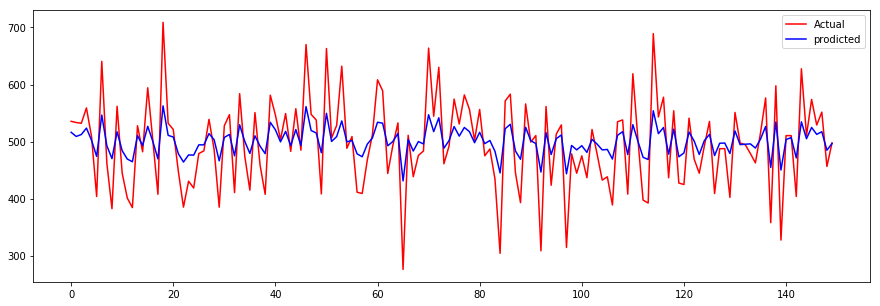

In [449]:
fir, ax = plt.subplots(figsize=(15,5))
a1, =plt.plot(y_test, color='red')
a2,=plt.plot(predicted_y, color='blue')
plt.legend([a1,a2], ["Actual", "prodicted"])

Text(0.5,1,'Residual plot')

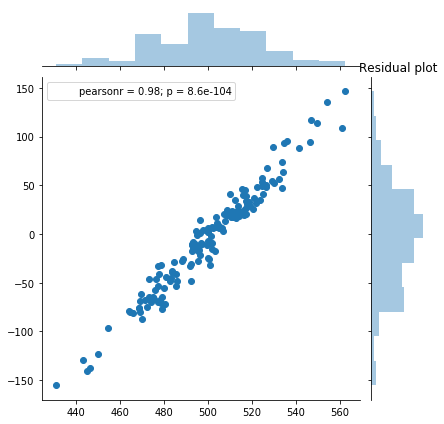

In [450]:
sns.jointplot(predicted_values, y_test - predicted_values )
plt.title('Residual plot')

In [ ]:
damn

# Linear Regression

In [418]:
X = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = df['Yearly Amount Spent']



In [419]:
from sklearn.model_selection import train_test_split

In [420]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [421]:
from sklearn.linear_model import LinearRegression

In [422]:
lrm = LinearRegression()

In [423]:
lrm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [424]:
pred_lrm = lrm.predict(X_test)

In [425]:

print('intercept: ', lrm.intercept_, '  slop: ',lrm.coef_)
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, pred_lrm)))
print('R square: ',metrics.r2_score(y_test, pred_lrm))

intercept:  -1044.25741464   slop:  [ 25.5962591   38.78534598   0.31038593  61.89682859]
RMSE:  10.4815905846
R square:  0.977813062918


Text(0.5,1,'Residual plot')

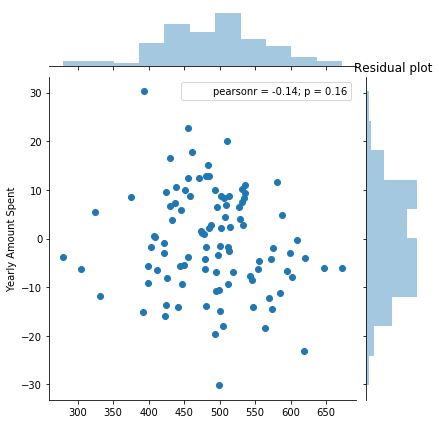

In [426]:
sns.jointplot(pred_lrm, y_test - pred_lrm )
plt.title('Residual plot')

In [431]:
pred_lrm = np.array(pred_lrm)
y_test = np.array(y_test)

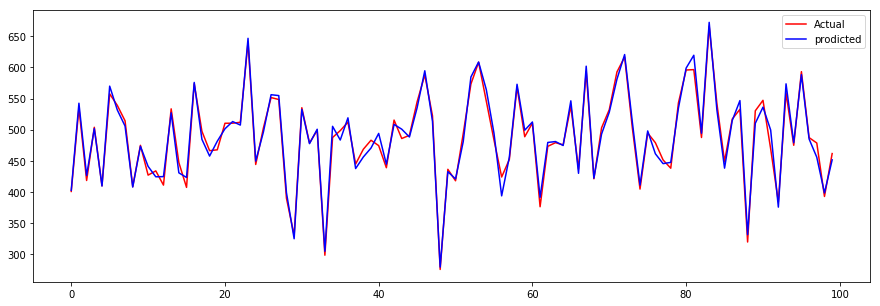

In [432]:

fir, ax = plt.subplots(figsize=(15,5))
a1, =plt.plot(y_test, color='red')
a2,=plt.plot(pred_lrm, color='blue')
plt.legend([a1,a2], ["Actual", "prodicted"])

In [ ]:
Almost perfect

In [113]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://tse3.mm.bing.net/th?id=OIP.YzwRxgEhBpkw6IcikKi9jwHaE8&pid=Api", width=1000, height=1000)